# Importing required libraries

In [154]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import numpy as np

import seaborn as sns
sns.set_style('whitegrid')

import requests

from bs4 import BeautifulSoup

import csv

import json
from pandas.io.json import json_normalize

from sklearn.cluster import KMeans

import matplotlib.cm as cm
import matplotlib.colors as colors

from IPython.display import display, Image

import datetime

import matplotlib.pyplot as plt
%matplotlib inline

from tqdm import tqdm
from geopy.extra.rate_limiter import RateLimiter

import math

In [3]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python-3.7-OpenCE

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    branca-0.4.2               |     pyhd8ed1ab_0          26 KB  conda-forge
    certifi-2021.5.30          |   py37h89c1867_0         141 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    openssl-1.1.1k             |       h7f98852_0         2.1 MB  conda-forge
    python_abi-3.7             |          2_cp37m           4 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    widgetsnbextension-3.5.1   |   py37h89c1867_4         1.8 MB  conda-f

In [4]:
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python-3.7-OpenCE

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.52         |     pyhd8ed1ab_0          35 KB  conda-forge
    geopy-2.2.0                |     pyhd8ed1ab_0          67 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         102 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.52-pyhd8ed1ab_0
  geopy              conda-forge/noarch::geopy-2.2.0-pyhd8ed1ab_0



geopy-2.2.0          | 67 KB     | ##################################### | 100% 
geographiclib-1.52   | 35 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transac

# Importing data

In [5]:
# The code was removed by Watson Studio for sharing.

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103221 entries, 0 to 103220
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                103221 non-null  object 
 1   town                 103221 non-null  object 
 2   flat_type            103221 non-null  object 
 3   block                103221 non-null  object 
 4   street_name          103221 non-null  object 
 5   storey_range         103221 non-null  object 
 6   floor_area_sqm       103221 non-null  float64
 7   flat_model           103221 non-null  object 
 8   lease_commence_date  103221 non-null  int64  
 9   remaining_lease      103221 non-null  object 
 10  resale_price         103221 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 8.7+ MB


# Data exploration

In [7]:
df.describe(include='all')

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
count,103221,103221,103221,103221,103221,103221,103221.000000,103221,103221.000000,103221,1.032210e+05
unique,55,26,7,2532,552,17,NaN,20,NaN,639,NaN
top,2018-07,SENGKANG,4 ROOM,2,YISHUN RING RD,04 TO 06,NaN,Model A,NaN,94 years 11 months,NaN
freq,2539,8595,42912,352,1494,23908,NaN,33809,NaN,812,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,97.804875,NaN,1994.762238,NaN,4.511976e+05
std,NaN,NaN,NaN,NaN,NaN,NaN,24.185541,NaN,13.254847,NaN,1.566066e+05
min,NaN,NaN,NaN,NaN,NaN,NaN,31.000000,NaN,1966.000000,NaN,1.400000e+05
25%,NaN,NaN,NaN,NaN,NaN,NaN,82.000000,NaN,1985.000000,NaN,3.380000e+05
50%,NaN,NaN,NaN,NaN,NaN,NaN,95.000000,NaN,1995.000000,NaN,4.200000e+05
75%,NaN,NaN,NaN,NaN,NaN,NaN,113.000000,NaN,2004.000000,NaN,5.300000e+05


In [8]:
df2 = df.groupby('town')

In [9]:
df2.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0
56,2017-01,BEDOK,2 ROOM,101,BEDOK NTH AVE 4,04 TO 06,45.0,Improved,1978,60 years 06 months,238000.0
57,2017-01,BEDOK,3 ROOM,548,BEDOK NTH AVE 1,04 TO 06,68.0,New Generation,1980,62 years 06 months,272000.0
58,2017-01,BEDOK,3 ROOM,75,BEDOK NTH RD,07 TO 09,59.0,Improved,1978,60 years,278000.0
59,2017-01,BEDOK,3 ROOM,550,BEDOK NTH AVE 1,01 TO 03,68.0,New Generation,1980,62 years 05 months,280000.0
60,2017-01,BEDOK,3 ROOM,1,BEDOK STH AVE 1,01 TO 03,59.0,Improved,1976,58 years,280000.0


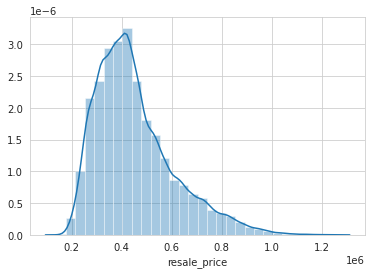

In [10]:
sns.distplot(df['resale_price'], bins = 30)

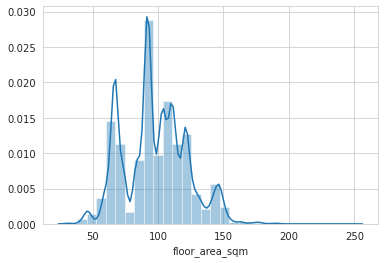

In [11]:
sns.distplot(df['floor_area_sqm'], bins = 30)

In [12]:
df['remaining_lease'] = 2021 - df['lease_commence_date']

In [13]:
df.drop('lease_commence_date', axis = 1, inplace=True)

In [14]:
df.drop(['block', 'street_name'], axis = 1, inplace=True)

In [15]:
df['price_per_sqm'] = df['resale_price'] / df['floor_area_sqm']
df.head()

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,remaining_lease,resale_price,price_per_sqm
0,2017-01,ANG MO KIO,2 ROOM,10 TO 12,44.0,Improved,42,232000.0,5272.727273
1,2017-01,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,43,250000.0,3731.343284
2,2017-01,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,41,262000.0,3910.447761
3,2017-01,ANG MO KIO,3 ROOM,04 TO 06,68.0,New Generation,41,265000.0,3897.058824
4,2017-01,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,41,265000.0,3955.223881


In [16]:
df.head()

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,remaining_lease,resale_price,price_per_sqm
0,2017-01,ANG MO KIO,2 ROOM,10 TO 12,44.0,Improved,42,232000.0,5272.727273
1,2017-01,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,43,250000.0,3731.343284
2,2017-01,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,41,262000.0,3910.447761
3,2017-01,ANG MO KIO,3 ROOM,04 TO 06,68.0,New Generation,41,265000.0,3897.058824
4,2017-01,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,41,265000.0,3955.223881


In [17]:
df.tail()

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,remaining_lease,resale_price,price_per_sqm
103216,2021-07,YISHUN,EXECUTIVE,04 TO 06,142.0,Apartment,33,630000.0,4436.619718
103217,2021-07,YISHUN,EXECUTIVE,01 TO 03,146.0,Maisonette,33,618000.0,4232.876712
103218,2021-07,YISHUN,EXECUTIVE,07 TO 09,146.0,Maisonette,33,665000.0,4554.794521
103219,2021-07,YISHUN,EXECUTIVE,07 TO 09,142.0,Apartment,34,700000.0,4929.577465
103220,2021-07,YISHUN,EXECUTIVE,01 TO 03,145.0,Maisonette,33,730000.0,5034.482759


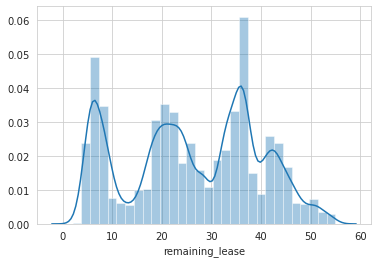

In [18]:
sns.distplot(df['remaining_lease'], bins = 30)

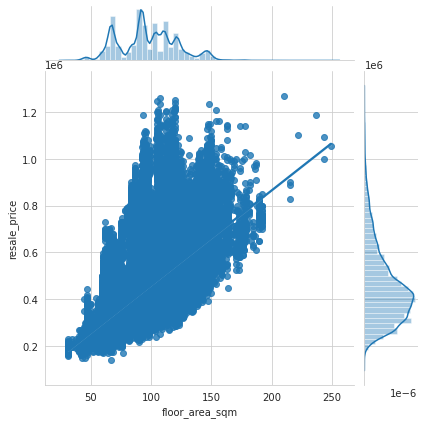

In [19]:
sns.jointplot(x = 'floor_area_sqm',y = 'resale_price', data=df, kind='reg')

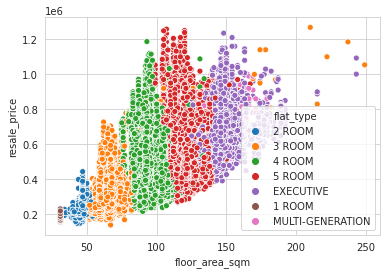

In [20]:
sns.scatterplot(x = 'floor_area_sqm',y = 'resale_price', data=df, hue = 'flat_type')

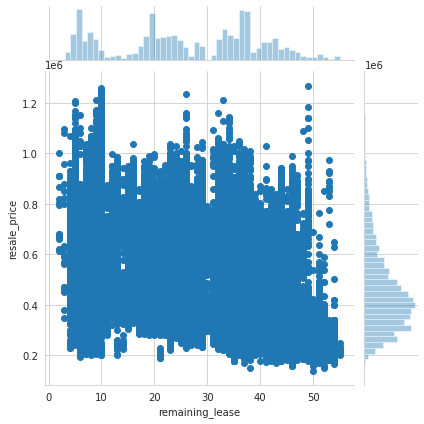

In [21]:
sns.jointplot(x = 'remaining_lease',y = 'resale_price', data=df )

In [22]:
df.head()

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,remaining_lease,resale_price,price_per_sqm
0,2017-01,ANG MO KIO,2 ROOM,10 TO 12,44.0,Improved,42,232000.0,5272.727273
1,2017-01,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,43,250000.0,3731.343284
2,2017-01,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,41,262000.0,3910.447761
3,2017-01,ANG MO KIO,3 ROOM,04 TO 06,68.0,New Generation,41,265000.0,3897.058824
4,2017-01,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,41,265000.0,3955.223881


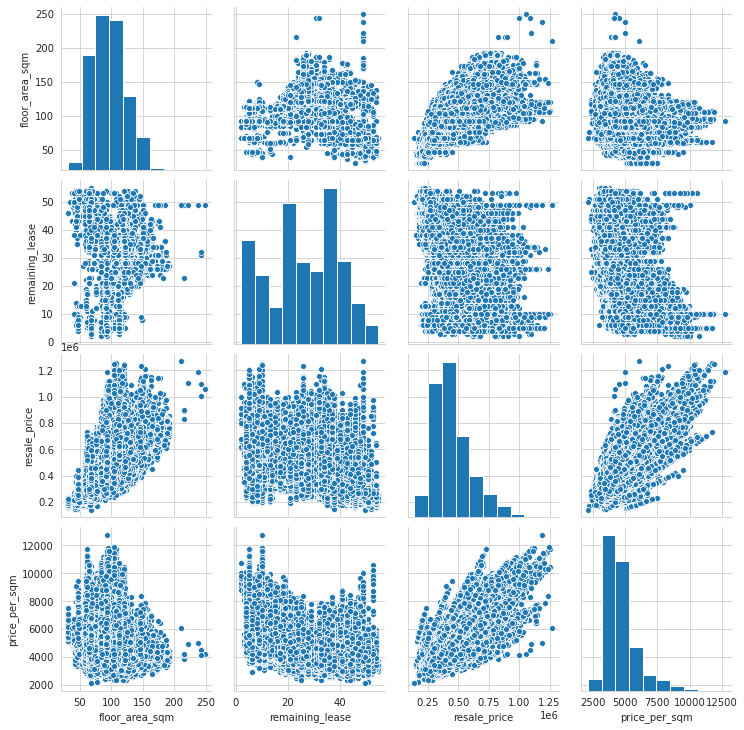

In [23]:
sns.pairplot(df)

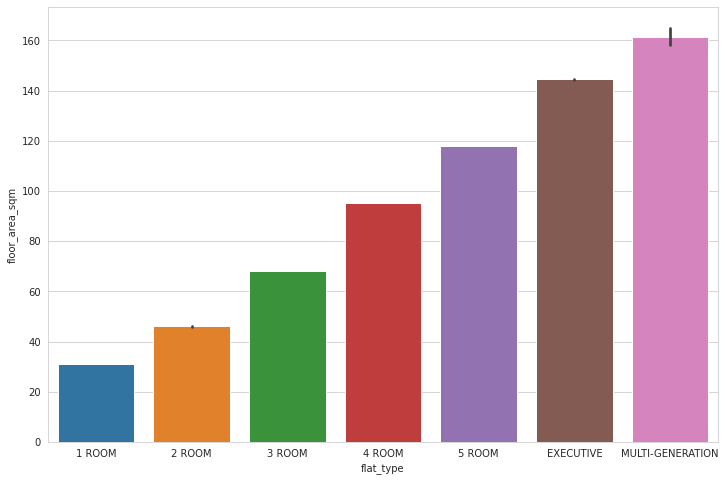

In [24]:
plt.figure(figsize=(12,8))
order = ['1 ROOM', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', 'MULTI-GENERATION']
sns.barplot(x='flat_type', y='floor_area_sqm', data=df, order = order)

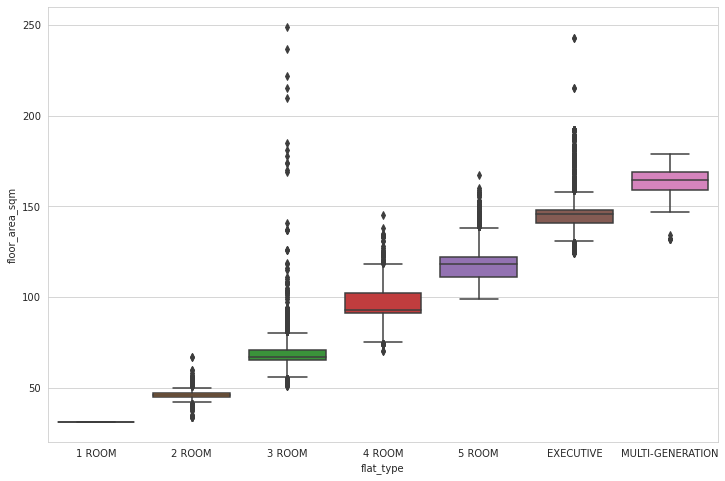

In [25]:
plt.figure(figsize=(12,8))
order = ['1 ROOM', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', 'MULTI-GENERATION']
sns.boxplot(x='flat_type', y='floor_area_sqm', data=df, order = order)

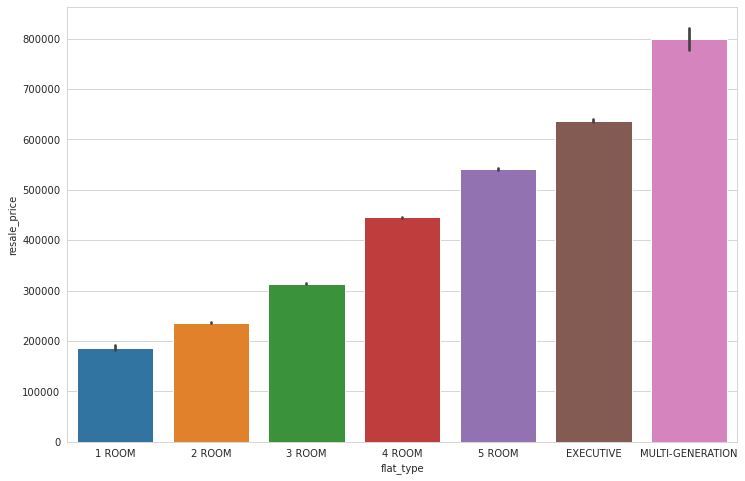

In [26]:
plt.figure(figsize=(12,8))
order = ['1 ROOM', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', 'MULTI-GENERATION']
sns.barplot(x='flat_type', y='resale_price', data=df, order = order)

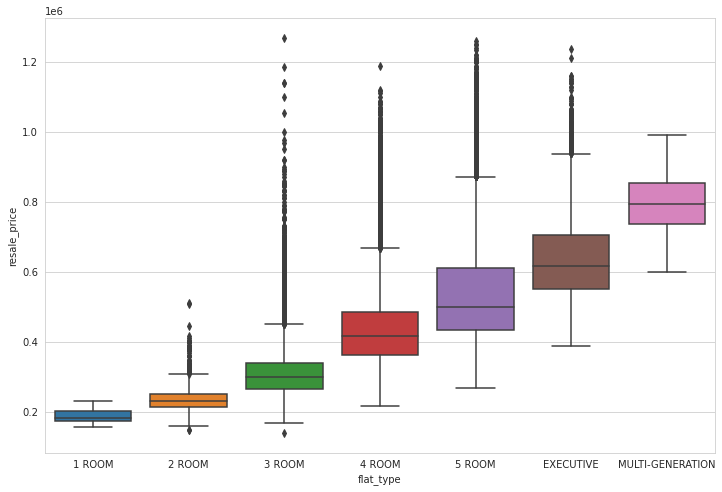

In [27]:
plt.figure(figsize=(12,8))
order = ['1 ROOM', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', 'MULTI-GENERATION']
sns.boxplot(x='flat_type', y='resale_price', data=df, order = order)

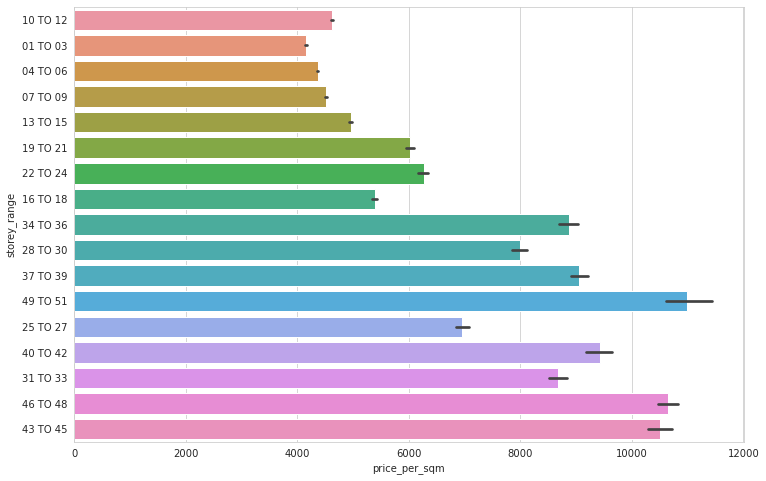

In [28]:
plt.figure(figsize=(12,8))
sns.barplot(y='storey_range', x='price_per_sqm', data=df)

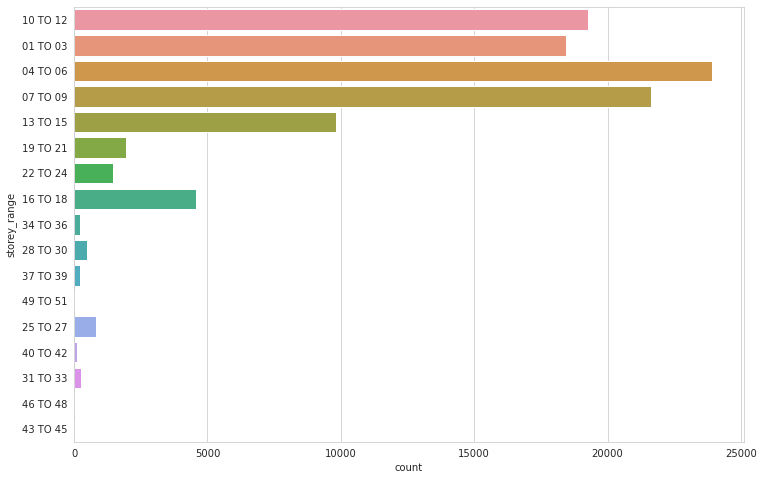

In [29]:
plt.figure(figsize=(12,8))
sns.countplot(y='storey_range', data=df)

In [30]:
df.shape

(103221, 9)

In [31]:
df.groupby('storey_range').describe()

floor_area_sqm                                                  \
                      count       mean        std   min    25%   50%    75%   
storey_range                                                                  
01 TO 03            18430.0  98.093348  25.932560  31.0  74.00  95.0  114.0   
04 TO 06            23908.0  97.738673  25.408744  31.0  74.00  95.0  113.0   
07 TO 09            21630.0  97.004877  24.442774  31.0  75.00  94.0  112.0   
10 TO 12            19269.0  97.940858  24.347894  31.0  82.00  95.0  113.0   
13 TO 15             9815.0  98.853439  20.967850  40.0  90.00  95.0  112.0   
16 TO 18             4555.0  98.341822  20.135634  42.0  90.00  95.0  112.0   
19 TO 21             1958.0  98.691011  20.894974  46.0  90.00  96.0  116.0   
22 TO 24             1464.0  99.524590  19.084034  46.0  91.00  96.0  115.0   
25 TO 27              820.0  96.675610  18.032656  46.0  90.00  93.5  113.0   
28 TO 30              501.0  96.203593  16.082738  46.0  90.00  95.0  110.0   
31 TO 33              246.0  92.577236  16.042804  60.0  85.25  92.0  105.0   
34 TO 36              236.0  92.487288  14.924343  60.0  84.50  92.0  101.0   
37 TO 39              224.0  93.169643  15.677460  60.0  85.75  92.5  107.0   
40 TO 42              108.0  93.564815  15.836355  60.0  85.00  93.0  107.0   
43 TO 45               25.0  90.960000  11.308109  65.0  87.00  93.0   96.0   
46 TO 48               23.0  93.347826  10.973558  65.0  93.00  95.0   96.5   
49 TO 51                9.0  97.666667   5.500000  94.0  94.00  94.0  105.0   

                    remaining_lease                                          \
                max           count       mean        std   min   25%   50%   
storey_range                                                                  
01 TO 03      249.0         18430.0  29.397830  11.875617   3.0  22.0  33.0   
04 TO 06      192.0         23908.0  28.398277  12.538862   2.0  20.0  32.0   
07 TO 09      243.0         21630.0  27.795932  12.977215   2.0  19.0  29.0   
10 TO 12      243.0         19269.0  26.700815  13.090882   2.0  18.0  28.0   
13 TO 15      182.0          9815.0  20.064391  13.016783   2.0   8.0  19.0   
16 TO 18      215.0          4555.0  18.043688  12.679232   4.0   7.0  17.0   
19 TO 21      163.0          1958.0  20.112870  14.086927   2.0   8.0  17.0   
22 TO 24      169.0          1464.0  18.644126  13.592487   2.0   8.0  15.0   
25 TO 27      139.0           820.0  15.303659  11.013001   2.0   8.0  10.0   
28 TO 30      126.0           501.0  11.998004   5.018964   4.0   8.0  10.0   
31 TO 33      124.0           246.0   8.357724   2.416373   3.0   7.0   8.0   
34 TO 36      124.0           236.0   8.813559   2.543073   2.0   8.0   8.5   
37 TO 39      120.0           224.0   8.700893   2.406046   3.0   8.0   9.0   
40 TO 42      120.0           108.0   8.379630   2.406058   2.0   7.0   9.0   
43 TO 45      108.0            25.0   7.080000   2.706782   2.0   5.0   5.0   
46 TO 48      107.0            23.0   8.782609   2.430049   2.0  10.0  10.0   
49 TO 51      105.0             9.0  10.000000   0.000000  10.0  10.0  10.0   

                          resale_price                                         \
                75%   max        count          mean            std       min   
storey_range                                                                    
01 TO 03      37.00  55.0      18430.0  4.055948e+05  135360.762592  150000.0   
04 TO 06      37.00  55.0      23908.0  4.244214e+05  139747.967055  150000.0   
07 TO 09      37.00  54.0      21630.0  4.350271e+05  138930.932507  165000.0   
10 TO 12      37.00  54.0      19269.0  4.493574e+05  144305.220687  140000.0   
13 TO 15      26.00  54.0       9815.0  4.859671e+05  144007.603636  170000.0   
16 TO 18      22.00  54.0       4555.0  5.245711e+05  159503.940405  180100.0   
19 TO 21      27.75  53.0       1958.0  5.916874e+05  187913.613956  180000.0   
22 TO 24      23.00  49.0       1464.0  6

In [32]:
storey = ['43 TO 45', '46 TO 48', '31 TO 33', '40 TO 42', '49 TO 51', '37 TO 39', '28 TO 30', '34 TO 36']

for i in storey:
    df.drop(df[df['storey_range'] == i].index, inplace = True)
df.shape

(101849, 9)

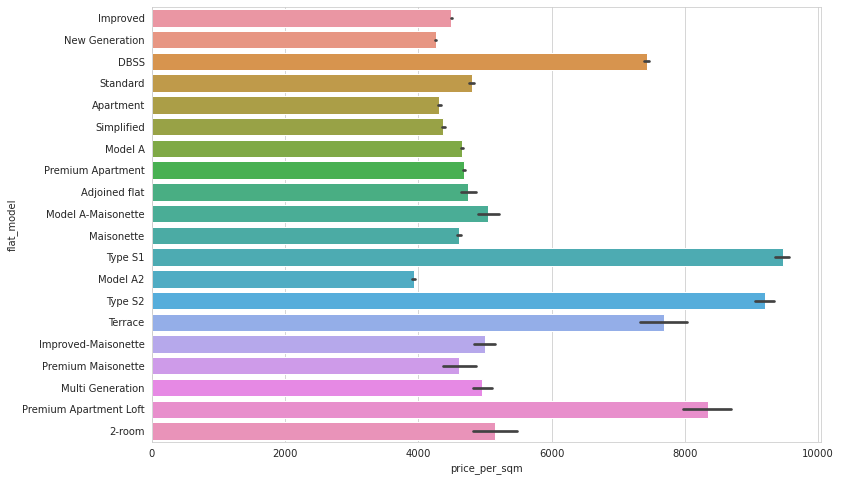

In [33]:
plt.figure(figsize=(12,8))
sns.barplot(y='flat_model', x='price_per_sqm', data=df)

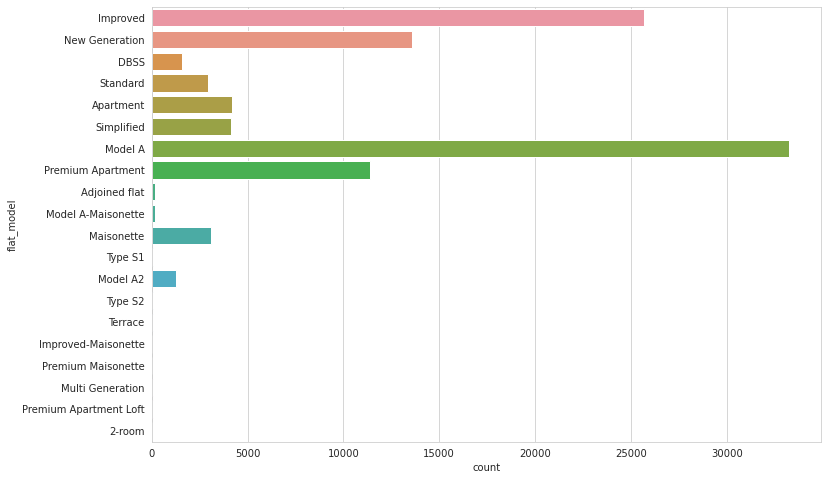

In [34]:
plt.figure(figsize=(12,8))
sns.countplot(y='flat_model', data=df)

In [35]:
df.groupby(['flat_model','town']).count()

month  flat_type  storey_range  \
flat_model             town                                              
2-room                 JURONG WEST          1          1             1   
                       PASIR RIS            2          2             2   
                       SENGKANG             2          2             2   
                       TAMPINES             1          1             1   
Adjoined flat          ANG MO KIO          43         43            43   
                       BEDOK               18         18            18   
                       BISHAN               2          2             2   
                       BUKIT BATOK          5          5             5   
                       BUKIT MERAH         13         13            13   
                       BUKIT TIMAH          1          1             1   
                       CENTRAL AREA         3          3             3   
                       CHOA CHU KANG        1          1             1   
                       CLEMENTI            13         13            13   
                       GEYLANG             12         12            12   
                       HOUGANG              4          4             4   
                       JURONG EAST          4          4             4   
                       JURONG WEST          7          7             7   
                       KALLANG/WHAMPOA     14         14            14   
                       MARINE PARADE        4          4             4   
                       QUEENSTOWN          21         21            21   
                       SERANGOON            5          5             5   
                       TAMPINES             6          6             6   
                       TOA PAYOH            7          7             7   
                       WOODLANDS            5          5             5   
                       YISHUN               7          7             7   
Apartment              ANG MO KIO          27         27            27   
                       BEDOK              153        153           153   
                       BISHAN              25         25            25   
                       BUKIT BATOK        172        172           172   
                       BUKIT PANJANG      186        186           186   
                       BUKIT TIMAH          2          2             2   
                       CHOA CHU KANG      279        279           279   
                       CLEMENTI             9          9             9   
                       GEYLANG             23         23            23   
                       HOUGANG            197        197           197   
                       JURONG EAST        103        103           103   
                       JURONG WEST        448        448           448   
                       KALLANG/WHAMPOA     28         28            28   
                       PASIR RIS          650        650           650   
                       QUEENSTOWN          20         20            20   
                       SEMBAWANG          241        241           241   
                       SENGKANG           378        378           378   
                       SERANGOON          126        126           126   
                       TAMPINES           336        336           336   
                       TOA PAYOH           21         21            21   
                       WOODLANDS          571        571           571   
                       YISHUN             171        171           171   
DBSS                   ANG MO KIO         180        180           180   
                       BEDOK              112        112           112   
                       BISHAN              98         98            98   
                       CLEMENTI            91         91            91   
                       HOUGANG            110        110           110   
                       JURONG WEST         9

In [36]:
df.groupby('flat_model').count()

,month,town,flat_type,storey_range,floor_area_sqm,remaining_lease,resale_price,price_per_sqm
flat_model,,,,,,,,
2-room,6,6,6,6,6,6,6,6
Adjoined flat,195,195,195,195,195,195,195,195
Apartment,4166,4166,4166,4166,4166,4166,4166,4166
DBSS,1601,1601,1601,1601,1601,1601,1601,1601
Improved,25688,25688,25688,25688,25688,25688,25688,25688
Improved-Maisonette,16,16,16,16,16,16,16,16
Maisonette,3108,3108,3108,3108,3108,3108,3108,3108
Model A,33263,33263,33263,33263,33263,33263,33263,33263
Model A-Maisonette,184,184,184,184,184,184,184,184


In [37]:
df.head()

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,remaining_lease,resale_price,price_per_sqm
0,2017-01,ANG MO KIO,2 ROOM,10 TO 12,44.0,Improved,42,232000.0,5272.727273
1,2017-01,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,43,250000.0,3731.343284
2,2017-01,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,41,262000.0,3910.447761
3,2017-01,ANG MO KIO,3 ROOM,04 TO 06,68.0,New Generation,41,265000.0,3897.058824
4,2017-01,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,41,265000.0,3955.223881


In [38]:
df2 = df[(df['flat_model'] == 'Improved') | (df['flat_model'] == 'Model A')]

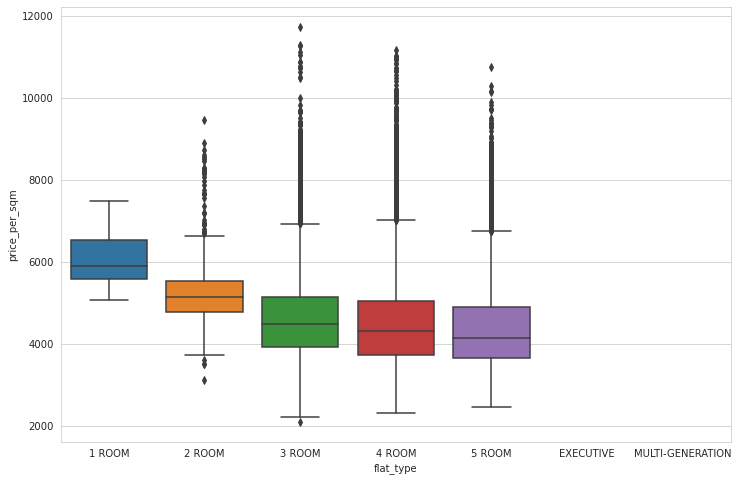

In [39]:
plt.figure(figsize=(12,8))
order = ['1 ROOM', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', 'MULTI-GENERATION']
sns.boxplot(x='flat_type', y='price_per_sqm', data=df2, order = order)

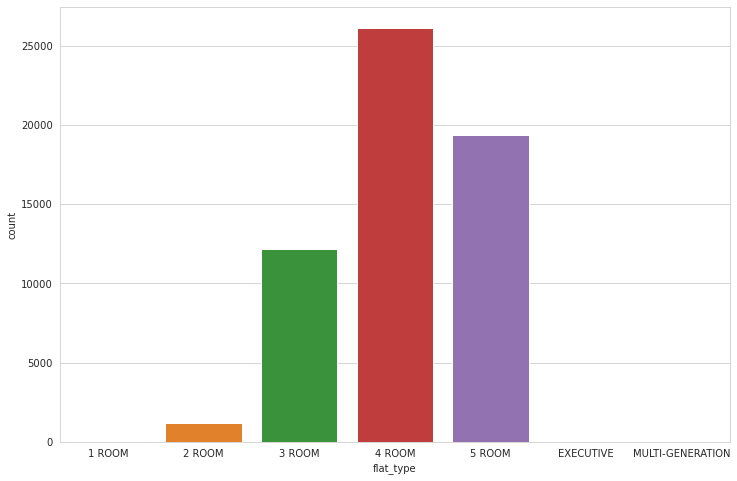

In [40]:
plt.figure(figsize=(12,8))
order = ['1 ROOM', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', 'MULTI-GENERATION']
sns.countplot(x='flat_type', data=df2, order = order)

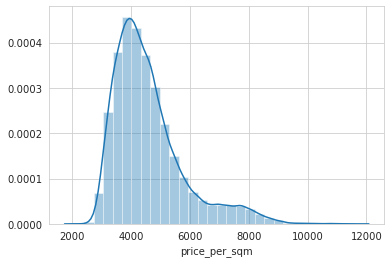

In [41]:
sns.distplot(df2['price_per_sqm'], bins = 30)

In [42]:
# Drop 1 Room, 2 Room and Mulit-generation

df2.drop(df2[df2['flat_type'] == '1 ROOM'].index, inplace = True)
df2.drop(df2[df2['flat_type'] == '2 ROOM'].index, inplace = True)


/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [43]:
df2.drop(df2[df2['flat_type'] == 'EXECUTIVE'].index, inplace = True)
df2.drop(df2[df2['flat_type'] == 'MULTI-GENERATION'].index, inplace = True)

In [44]:
df2.groupby('flat_type')['price_per_sqm'].describe()

,count,mean,std,min,25%,50%,75%,max
flat_type,,,,,,,,
3 ROOM,12209.0,4689.321969,1119.376040,2089.552239,3932.203390,4490.865672,5134.666667,11741.935484
4 ROOM,26147.0,4631.724961,1313.745327,2307.692308,3737.864078,4311.111111,5055.555556,11172.413793
5 ROOM,19366.0,4426.521302,1104.657731,2459.016393,3653.225806,4132.231405,4893.805310,10763.392857


In [45]:
# drop lesser then 25% and more then 75%
df2.drop(df2[df2['price_per_sqm'] > 6500].index, inplace = True)

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [46]:
df2.groupby('flat_type')['price_per_sqm'].describe()

,count,mean,std,min,25%,50%,75%,max
flat_type,,,,,,,,
3 ROOM,11367.0,4464.061257,743.454998,2089.552239,3893.636364,4411.764706,4969.230769,6500.0
4 ROOM,23357.0,4271.625655,806.783666,2307.692308,3666.666667,4184.782609,4770.521739,6500.0
5 ROOM,18113.0,4223.595991,800.907348,2459.016393,3625.954198,4063.636364,4705.882353,6500.0


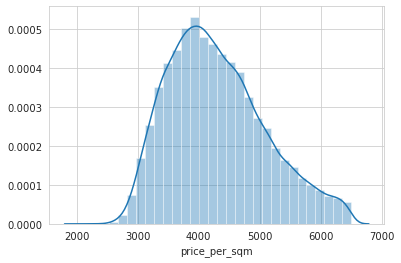

In [47]:
sns.distplot(df2['price_per_sqm'], bins = 30)

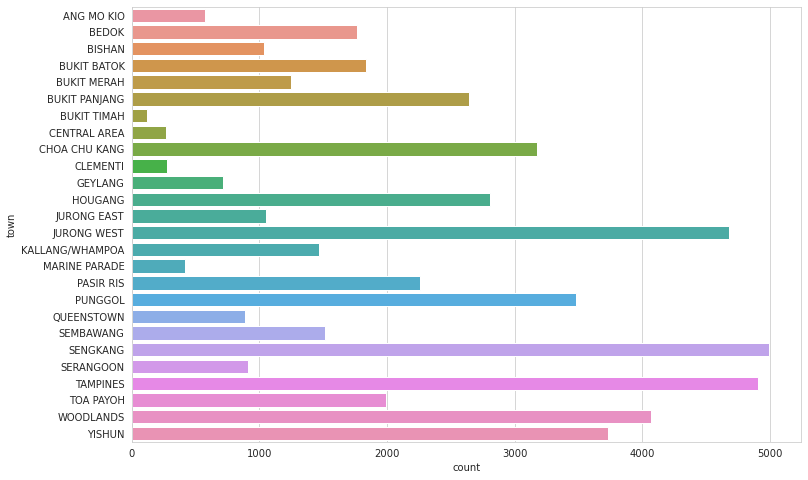

In [48]:
plt.figure(figsize=(12,8))
sns.countplot(y='town', data=df2)

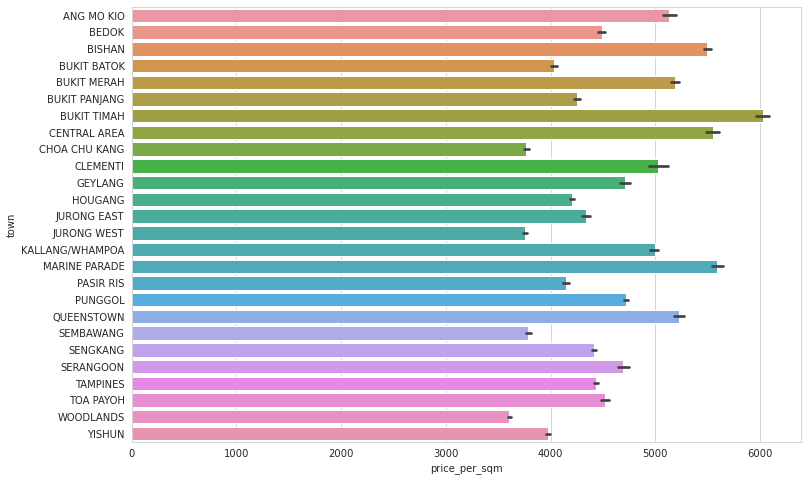

In [52]:
plt.figure(figsize=(12,8))
sns.barplot(y='town', x='price_per_sqm', data=df2)

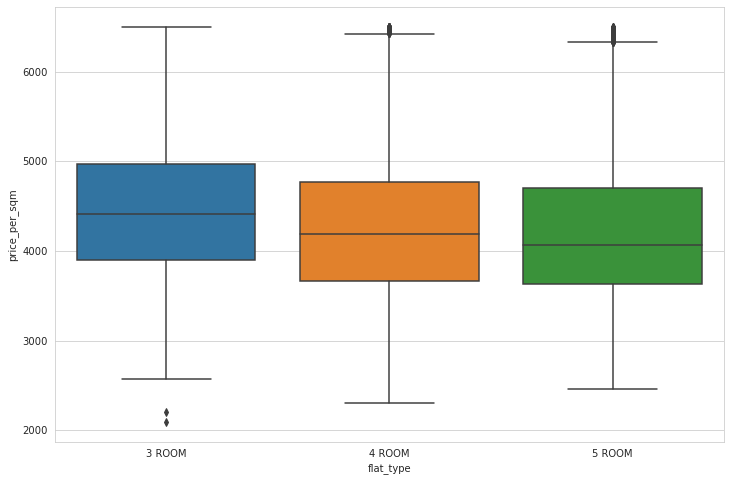

In [50]:
plt.figure(figsize=(12,8))
order = ['3 ROOM', '4 ROOM', '5 ROOM']
sns.boxplot(x='flat_type', y='price_per_sqm', data=df2, order = order)

In [53]:
df2.head()

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,remaining_lease,resale_price,price_per_sqm
50,2017-01,ANG MO KIO,5 ROOM,13 TO 15,119.0,Improved,42,668000.0,5613.445378
51,2017-01,ANG MO KIO,5 ROOM,19 TO 21,118.0,Improved,41,668000.0,5661.016949
52,2017-01,ANG MO KIO,5 ROOM,13 TO 15,119.0,Improved,41,725000.0,6092.436975
58,2017-01,BEDOK,3 ROOM,07 TO 09,59.0,Improved,43,278000.0,4711.864407
60,2017-01,BEDOK,3 ROOM,01 TO 03,59.0,Improved,45,280000.0,4745.762712


In [54]:
df2 = df2[['town', 'flat_type', 'price_per_sqm']]
df2.shape

(52837, 3)

In [55]:
df2.head()

,town,flat_type,price_per_sqm
50,ANG MO KIO,5 ROOM,5613.445378
51,ANG MO KIO,5 ROOM,5661.016949
52,ANG MO KIO,5 ROOM,6092.436975
58,BEDOK,3 ROOM,4711.864407
60,BEDOK,3 ROOM,4745.762712


In [56]:
df3 = df2.groupby(['town']).mean().reset_index()

In [57]:
df3

,town,price_per_sqm
0,ANG MO KIO,5132.486882
1,BEDOK,4485.940207
2,BISHAN,5496.845650
3,BUKIT BATOK,4031.956300
4,BUKIT MERAH,5185.617233
5,BUKIT PANJANG,4247.042908
6,BUKIT TIMAH,6023.607534
7,CENTRAL AREA,5544.914149
8,CHOA CHU KANG,3764.602690
9,CLEMENTI,5028.443654


In [58]:
df4 = df3.drop(['price_per_sqm'], axis=1)

In [59]:
df4 = df4.drop_duplicates(subset=None, keep='first', inplace=False).reset_index()
df4.drop('index', axis=1, inplace =True)

In [60]:
df4

,town
0,ANG MO KIO
1,BEDOK
2,BISHAN
3,BUKIT BATOK
4,BUKIT MERAH
5,BUKIT PANJANG
6,BUKIT TIMAH
7,CENTRAL AREA
8,CHOA CHU KANG
9,CLEMENTI


# Importing planning area data

In [61]:
# Initialising geocoding agent
geolocator = Nominatim(user_agent="Mozilla/76.0")
location = geolocator.geocode("Singapore")
latitude = location.latitude
longitude = location.longitude
print(f"Coordinates of Singapore are {latitude}, {longitude}")

Coordinates of Singapore are 1.357107, 103.8194992


In [62]:
# Adding two new empty columns to dataframe
df3["latitude"] = 0.0
df3["longitude"] = 0.0
df3.head()

,town,price_per_sqm,latitude,longitude
0,ANG MO KIO,5132.486882,0.0,0.0
1,BEDOK,4485.940207,0.0,0.0
2,BISHAN,5496.845650,0.0,0.0
3,BUKIT BATOK,4031.956300,0.0,0.0
4,BUKIT MERAH,5185.617233,0.0,0.0


In [63]:
# Retrieve town coordinates 
geo= Nominatim(user_agent='mypythonapi')
for idx,town in df3['town'].iteritems():
    coord=geo.geocode(town+' '+'Singapore',timeout=10)
    if coord:
        df3.loc[idx,'latitude'] = coord.latitude
        df3.loc[idx,'longitude'] = coord.longitude
    else:
        df3.loc[idx,'latitude'] = NULL
        df3.loc[idx,'longitude'] = NULL

In [64]:
df3

,town,price_per_sqm,latitude,longitude
0,ANG MO KIO,5132.486882,1.370080,103.849523
1,BEDOK,4485.940207,1.323976,103.930216
2,BISHAN,5496.845650,1.350986,103.848255
3,BUKIT BATOK,4031.956300,1.349057,103.749591
4,BUKIT MERAH,5185.617233,1.274864,103.820276
5,BUKIT PANJANG,4247.042908,1.379149,103.761413
6,BUKIT TIMAH,6023.607534,1.354690,103.776372
7,CENTRAL AREA,5544.914149,1.385510,103.841361
8,CHOA CHU KANG,3764.602690,1.384749,103.744534
9,CLEMENTI,5028.443654,1.315100,103.765231


In [65]:
df3['price_per_sqm'] = df3['price_per_sqm'].round()

In [66]:
df3.head()

,town,price_per_sqm,latitude,longitude
0,ANG MO KIO,5132.0,1.370080,103.849523
1,BEDOK,4486.0,1.323976,103.930216
2,BISHAN,5497.0,1.350986,103.848255
3,BUKIT BATOK,4032.0,1.349057,103.749591
4,BUKIT MERAH,5186.0,1.274864,103.820276


In [67]:
df3['latitude'][7] = 1.291667
df3['longitude'][7] = 103.85

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


# Singapore basemap

In [68]:
#create a map of Singapore 
map_singapore= folium.Map(location=[latitude,longitude],tiles="OpenStreetMap",zoom_start=11)

#add towns to map
for lat,lng,town,price in zip(df3['latitude'],df3['longitude'],
                        df3['town'],df3['price_per_sqm']):
    label='{},{}'.format(town, price)
    label= folium.Popup(label,parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=4,
    popup=label,
    color='green',
    fill=True,
    fill_color='#87cefa',
    fill_opacity=0.5,
    parse_html=False
    ).add_to(map_singapore)

In [69]:
map_singapore

# Define Foursquare credentials and version

In [70]:
# The code was removed by Watson Studio for sharing.

# Get top venues at all neighbourhoods

In [71]:
# Define function to get top venues at all neighbourhoods
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Town', 
                  'Town Latitude', 
                  'Town Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [72]:
# Run function to get top venues at all neighbourhoods

sg_town_venues = getNearbyVenues(names=df3['town'],
                                   latitudes=df3['latitude'],
                                   longitudes=df3['longitude']
                                  )

print('\n')
print('Completed')

ANG MO KIO
BEDOK
BISHAN
BUKIT BATOK
BUKIT MERAH
BUKIT PANJANG
BUKIT TIMAH
CENTRAL AREA
CHOA CHU KANG
CLEMENTI
GEYLANG
HOUGANG
JURONG EAST
JURONG WEST
KALLANG/WHAMPOA
MARINE PARADE
PASIR RIS
PUNGGOL
QUEENSTOWN
SEMBAWANG
SENGKANG
SERANGOON
TAMPINES
TOA PAYOH
WOODLANDS
YISHUN


Completed


In [73]:
# Check size and head of data frame
print(sg_town_venues.shape)
sg_town_venues.head()

(1080, 7)


,Town,Town Latitude,Town Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,ANG MO KIO,1.37008,103.849523,FairPrice Xtra,1.369279,103.848886,Supermarket
1,ANG MO KIO,1.37008,103.849523,Old Chang Kee,1.369094,103.848389,Snack Place
2,ANG MO KIO,1.37008,103.849523,MOS Burger,1.369170,103.847831,Burger Joint
3,ANG MO KIO,1.37008,103.849523,NTUC FairPrice,1.371507,103.847082,Supermarket
4,ANG MO KIO,1.37008,103.849523,A&W,1.369541,103.849043,Fast Food Restaurant


In [74]:
# Check number of venues returned for each neighbourhood

sg_town_venues.groupby('Town')['Venue'].count()

Town
ANG MO KIO         41
BEDOK              62
BISHAN             43
BUKIT BATOK        22
BUKIT MERAH        21
BUKIT PANJANG      41
BUKIT TIMAH        11
CENTRAL AREA       65
CHOA CHU KANG      22
CLEMENTI           64
GEYLANG            31
HOUGANG            34
JURONG EAST        71
JURONG WEST        68
KALLANG/WHAMPOA    37
MARINE PARADE      37
PASIR RIS          32
PUNGGOL            44
QUEENSTOWN         18
SEMBAWANG          23
SENGKANG           27
SERANGOON          39
TAMPINES           80
TOA PAYOH          47
WOODLANDS          52
YISHUN             48
Name: Venue, dtype: int64

# Analyzing each town

In [75]:
# One hot encoding
sg_onehot = pd.get_dummies(sg_town_venues[['Venue Category']], prefix="", prefix_sep="")

# Add neighborhood column back to dataframe
sg_onehot['Town'] = sg_town_venues['Town'] 

# Move neighborhood column to the first column
fixed_columns = [sg_onehot.columns[-1]] + list(sg_onehot.columns[:-1])
sg_onehot = sg_onehot[fixed_columns]

sg_onehot.head()

,Town,ATM,Accessories Store,American Restaurant,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bank,Bar,Basketball Court,Beer Bar,Betting Shop,Bistro,Bookstore,Bowling Alley,Breakfast Spot,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Cable Car,Café,Cantonese Restaurant,Cha Chaan Teng,Chinese Breakfast Place,Chinese Restaurant,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Cafeteria,Concert Hall,Convenience Store,Cosmetics Shop,Costume Shop,Cupcake Shop,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Shop,Dog Run,Donut Shop,Dumpling Restaurant,Electronics Store,Event Space,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flower Shop,Food Court,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Fujian Restaurant,Furniture / Home Store,German Restaurant,Government Building,Grocery Store,Gym,Gym / Fitness Center,Hainan Restaurant,Halal Restaurant,Health & Beauty Service,Hill,History Museum,Hobby Shop,Hong Kong Restaurant,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Light Rail Station,Lounge,Malay Restaurant,Market,Massage Studio,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Mountain,Movie Theater,Multiplex,Music Venue,Neighborhood,Night Market,Nightclub,Noodle House,Outlet Store,Paper / Office Supplies Store,Park,Persian Restaurant,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pool,Portuguese Restaurant,Post Office,Pub,Ramen Restaurant,Recreation Center,Rest Area,Restaurant,River,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shaanxi Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Snack Place,Soccer Field,Soccer Stadium,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Student Center,Supermarket,Sushi Restaurant,Taxi Stand,Tea Room,Thai Restaurant,Theater,Theme Park,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Waterfront,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,ANG MO KIO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,ANG MO KIO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,ANG MO KIO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,ANG MO KIO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,ANG MO KIO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,

In [76]:
# Size of df
sg_onehot.shape

(1080, 174)

In [77]:
sg_grouped = sg_onehot.groupby('Town').mean().reset_index()
sg_grouped

,Town,ATM,Accessories Store,American Restaurant,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bank,Bar,Basketball Court,Beer Bar,Betting Shop,Bistro,Bookstore,Bowling Alley,Breakfast Spot,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Cable Car,Café,Cantonese Restaurant,Cha Chaan Teng,Chinese Breakfast Place,Chinese Restaurant,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Cafeteria,Concert Hall,Convenience Store,Cosmetics Shop,Costume Shop,Cupcake Shop,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Shop,Dog Run,Donut Shop,Dumpling Restaurant,Electronics Store,Event Space,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flower Shop,Food Court,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Fujian Restaurant,Furniture / Home Store,German Restaurant,Government Building,Grocery Store,Gym,Gym / Fitness Center,Hainan Restaurant,Halal Restaurant,Health & Beauty Service,Hill,History Museum,Hobby Shop,Hong Kong Restaurant,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Light Rail Station,Lounge,Malay Restaurant,Market,Massage Studio,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Mountain,Movie Theater,Multiplex,Music Venue,Neighborhood,Night Market,Nightclub,Noodle House,Outlet Store,Paper / Office Supplies Store,Park,Persian Restaurant,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pool,Portuguese Restaurant,Post Office,Pub,Ramen Restaurant,Recreation Center,Rest Area,Restaurant,River,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shaanxi Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Snack Place,Soccer Field,Soccer Stadium,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Student Center,Supermarket,Sushi Restaurant,Taxi Stand,Tea Room,Thai Restaurant,Theater,Theme Park,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Waterfront,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,ANG MO KIO,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.024390,0.000000,0.000000,0.024390,0.02439,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.073171,0.000000,0.024390,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.024390,0.000000,0.000000,0.000000,0.097561,0.000000,0.000000,0.024390,0.000000,0.000000,0.000000,0.000000,0.073171,0.000000,0.00000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.024390,0.000000,0.000000,0.073171,0.000000,0.024390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.024390,0.024390,0.000000,0.024390,0.000000,0.000000,0.000000,0.02439,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.048780,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.024390,0.000000,0.000000,0.0000,0.000000,0.000000,0.02439,0.000000,0.024390,0.000000,0.000000,0.000000,0.024390,0.000000,0.000000,0.000000,0.000000,0.024390,0.000000,0.000000,0.000000,0.000000,0.000000,0.024390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.024390,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.024390,0.000000,0.000000,0.024390,0.000000,0.000000,0.024390,0.0000,0.000000,0.024390,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.048780,0.024390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,BEDO

In [78]:
# Confirm size
sg_grouped.shape

(26, 174)

# Clean up

In [79]:
sg_grouped['R Sum'] = 0

In [80]:
for i in sg_grouped.columns:
    if 'Restaurant' in i:
        sg_grouped['R Sum'] += sg_grouped[i]
        sg_grouped.drop([i], axis=1, inplace=True)
    else:
        pass

In [81]:
sg_grouped.shape

(26, 140)

In [82]:
sg_grouped['R Sum'] += sg_grouped['Steakhouse']
sg_grouped.drop(['Steakhouse'], axis=1, inplace=True)

In [83]:
# List of columns
columns = []
for i in sg_grouped.columns:
    columns.append(i)

columns

['Town',
 'ATM',
 'Accessories Store',
 'Arcade',
 'Art Gallery',
 'Arts & Crafts Store',
 'Athletics & Sports',
 'BBQ Joint',
 'Bakery',
 'Bank',
 'Bar',
 'Basketball Court',
 'Beer Bar',
 'Betting Shop',
 'Bistro',
 'Bookstore',
 'Bowling Alley',
 'Breakfast Spot',
 'Bubble Tea Shop',
 'Buffet',
 'Burger Joint',
 'Burrito Place',
 'Bus Line',
 'Bus Station',
 'Bus Stop',
 'Cable Car',
 'Café',
 'Cha Chaan Teng',
 'Chinese Breakfast Place',
 'Clothing Store',
 'Club House',
 'Cocktail Bar',
 'Coffee Shop',
 'College Cafeteria',
 'Concert Hall',
 'Convenience Store',
 'Cosmetics Shop',
 'Costume Shop',
 'Cupcake Shop',
 'Department Store',
 'Dessert Shop',
 'Diner',
 'Discount Store',
 'Dive Shop',
 'Dog Run',
 'Donut Shop',
 'Electronics Store',
 'Event Space',
 'Farmers Market',
 'Fish & Chips Shop',
 'Flower Shop',
 'Food Court',
 'Fried Chicken Joint',
 'Frozen Yogurt Shop',
 'Fruit & Vegetable Store',
 'Furniture / Home Store',
 'Government Building',
 'Grocery Store',
 'Gym',
 'G

In [84]:
casual_dining = [
 'Bakery',
 'Bistro',
 'Breakfast Spot',
 'Bubble Tea Shop',
 'Buffet',
 'Burger Joint',
 'Burrito Place',
 'Café',
 'Cha Chaan Teng',
 'Chinese Breakfast Place',
 'Coffee Shop',
 'College Cafeteria',
 'Cupcake Shop',
 'Dessert Shop',
 'Diner',
 'Donut Shop',
 'Fish & Chips Shop',
 'Food Court',
 'Fried Chicken Joint',
 'Frozen Yogurt Shop',
 'Ice Cream Shop',
 'Juice Bar',
 'Night Market',
 'Noodle House',
 'Pizza Place',
 'Salad Place',
 'Sandwich Place',
 'Snack Place',
 'Soup Place',
 'Tea Room']

In [85]:
sg_grouped['Casual Dining'] = 0

for i in casual_dining:
    sg_grouped['Casual Dining'] += sg_grouped[i]
    sg_grouped.drop([i], axis=1, inplace=True)

In [86]:
sg_grouped.shape

(26, 110)

In [87]:
# List of columns
columns = []
for i in sg_grouped.columns:
    columns.append(i)

columns

['Town',
 'ATM',
 'Accessories Store',
 'Arcade',
 'Art Gallery',
 'Arts & Crafts Store',
 'Athletics & Sports',
 'BBQ Joint',
 'Bank',
 'Bar',
 'Basketball Court',
 'Beer Bar',
 'Betting Shop',
 'Bookstore',
 'Bowling Alley',
 'Bus Line',
 'Bus Station',
 'Bus Stop',
 'Cable Car',
 'Clothing Store',
 'Club House',
 'Cocktail Bar',
 'Concert Hall',
 'Convenience Store',
 'Cosmetics Shop',
 'Costume Shop',
 'Department Store',
 'Discount Store',
 'Dive Shop',
 'Dog Run',
 'Electronics Store',
 'Event Space',
 'Farmers Market',
 'Flower Shop',
 'Fruit & Vegetable Store',
 'Furniture / Home Store',
 'Government Building',
 'Grocery Store',
 'Gym',
 'Gym / Fitness Center',
 'Health & Beauty Service',
 'Hill',
 'History Museum',
 'Hobby Shop',
 'Hookah Bar',
 'Hostel',
 'Hotel',
 'Hotel Bar',
 'Karaoke Bar',
 'Kids Store',
 'Kitchen Supply Store',
 'Lake',
 'Light Rail Station',
 'Lounge',
 'Market',
 'Massage Studio',
 'Metro Station',
 'Miscellaneous Shop',
 'Mobile Phone Shop',
 'Monumen

In [88]:
stores = [
 'Accessories Store',
 'Arts & Crafts Store',
 'Betting Shop',
 'Bookstore',
 'Clothing Store',
 'Convenience Store',
 'Cosmetics Shop',
 'Costume Shop',
 'Department Store',
 'Discount Store',
 'Dive Shop',
 'Electronics Store',
 'Flower Shop',
 'Furniture / Home Store',
 'Grocery Store',
 'Hobby Shop',
 'Kids Store',
 'Kitchen Supply Store',
 'Miscellaneous Shop',
 'Mobile Phone Shop',
 'Outlet Store',
 'Paper / Office Supplies Store',
 'Pet Store',
 'Pharmacy',
 'Salon / Barbershop',
 'Shoe Store',
 'Shopping Mall',
 'Sporting Goods Shop',
 'Thrift / Vintage Store',
 'Toy / Game Store',
 'Video Game Store',
 'Wine Shop']

sg_grouped['Stores'] = 0

for i in stores:
    sg_grouped['Stores'] += sg_grouped[i]
    sg_grouped.drop([i], axis=1, inplace=True)
    
sg_grouped.shape

(26, 79)

In [89]:
# List of columns
columns = []
for i in sg_grouped.columns:
    columns.append(i)

columns

['Town',
 'ATM',
 'Arcade',
 'Art Gallery',
 'Athletics & Sports',
 'BBQ Joint',
 'Bank',
 'Bar',
 'Basketball Court',
 'Beer Bar',
 'Bowling Alley',
 'Bus Line',
 'Bus Station',
 'Bus Stop',
 'Cable Car',
 'Club House',
 'Cocktail Bar',
 'Concert Hall',
 'Dog Run',
 'Event Space',
 'Farmers Market',
 'Fruit & Vegetable Store',
 'Government Building',
 'Gym',
 'Gym / Fitness Center',
 'Health & Beauty Service',
 'Hill',
 'History Museum',
 'Hookah Bar',
 'Hostel',
 'Hotel',
 'Hotel Bar',
 'Karaoke Bar',
 'Lake',
 'Light Rail Station',
 'Lounge',
 'Market',
 'Massage Studio',
 'Metro Station',
 'Monument / Landmark',
 'Mountain',
 'Movie Theater',
 'Multiplex',
 'Music Venue',
 'Neighborhood',
 'Nightclub',
 'Park',
 'Playground',
 'Plaza',
 'Pool',
 'Post Office',
 'Pub',
 'Recreation Center',
 'Rest Area',
 'River',
 'Scenic Lookout',
 'Sculpture Garden',
 'Skate Park',
 'Skating Rink',
 'Soccer Field',
 'Soccer Stadium',
 'Spa',
 'Speakeasy',
 'Sports Bar',
 'Stadium',
 'Student Cent

In [90]:
public_transport = [
 'Bus Line',
 'Bus Station',
 'Bus Stop',
 'Light Rail Station',
 'Metro Station',
 'Taxi Stand',
 'Train Station']

sg_grouped['Public Transport'] = 0

for i in public_transport:
    sg_grouped['Public Transport'] += sg_grouped[i]
    sg_grouped.drop([i], axis=1, inplace=True)

sg_grouped.shape

(26, 73)

In [91]:
# List of columns
columns = []
for i in sg_grouped.columns:
    columns.append(i)

columns

['Town',
 'ATM',
 'Arcade',
 'Art Gallery',
 'Athletics & Sports',
 'BBQ Joint',
 'Bank',
 'Bar',
 'Basketball Court',
 'Beer Bar',
 'Bowling Alley',
 'Cable Car',
 'Club House',
 'Cocktail Bar',
 'Concert Hall',
 'Dog Run',
 'Event Space',
 'Farmers Market',
 'Fruit & Vegetable Store',
 'Government Building',
 'Gym',
 'Gym / Fitness Center',
 'Health & Beauty Service',
 'Hill',
 'History Museum',
 'Hookah Bar',
 'Hostel',
 'Hotel',
 'Hotel Bar',
 'Karaoke Bar',
 'Lake',
 'Lounge',
 'Market',
 'Massage Studio',
 'Monument / Landmark',
 'Mountain',
 'Movie Theater',
 'Multiplex',
 'Music Venue',
 'Neighborhood',
 'Nightclub',
 'Park',
 'Playground',
 'Plaza',
 'Pool',
 'Post Office',
 'Pub',
 'Recreation Center',
 'Rest Area',
 'River',
 'Scenic Lookout',
 'Sculpture Garden',
 'Skate Park',
 'Skating Rink',
 'Soccer Field',
 'Soccer Stadium',
 'Spa',
 'Speakeasy',
 'Sports Bar',
 'Stadium',
 'Student Center',
 'Supermarket',
 'Theater',
 'Theme Park',
 'Trail',
 'Waterfront',
 'Wings Jo

In [92]:
fitness = [
 'Athletics & Sports',
 'Basketball Court',
 'Club House',
 'Gym',
 'Gym / Fitness Center',
 'Soccer Field',
 'Soccer Stadium',
 'Stadium',
 'Yoga Studio']

sg_grouped['Fitness'] = 0

for i in fitness:
    sg_grouped['Fitness'] += sg_grouped[i]
    sg_grouped.drop([i], axis=1, inplace=True)
    
sg_grouped.shape

(26, 65)

In [93]:
# List of columns
columns = []
for i in sg_grouped.columns:
    columns.append(i)

columns

['Town',
 'ATM',
 'Arcade',
 'Art Gallery',
 'BBQ Joint',
 'Bank',
 'Bar',
 'Beer Bar',
 'Bowling Alley',
 'Cable Car',
 'Cocktail Bar',
 'Concert Hall',
 'Dog Run',
 'Event Space',
 'Farmers Market',
 'Fruit & Vegetable Store',
 'Government Building',
 'Health & Beauty Service',
 'Hill',
 'History Museum',
 'Hookah Bar',
 'Hostel',
 'Hotel',
 'Hotel Bar',
 'Karaoke Bar',
 'Lake',
 'Lounge',
 'Market',
 'Massage Studio',
 'Monument / Landmark',
 'Mountain',
 'Movie Theater',
 'Multiplex',
 'Music Venue',
 'Neighborhood',
 'Nightclub',
 'Park',
 'Playground',
 'Plaza',
 'Pool',
 'Post Office',
 'Pub',
 'Recreation Center',
 'Rest Area',
 'River',
 'Scenic Lookout',
 'Sculpture Garden',
 'Skate Park',
 'Skating Rink',
 'Spa',
 'Speakeasy',
 'Sports Bar',
 'Student Center',
 'Supermarket',
 'Theater',
 'Theme Park',
 'Trail',
 'Waterfront',
 'Wings Joint',
 "Women's Store",
 'R Sum',
 'Casual Dining',
 'Stores',
 'Public Transport',
 'Fitness']

In [94]:
recreation = [
 'Arcade',
 'Art Gallery',
 'Bowling Alley',
 'Cable Car',
 'Concert Hall',
 'Dog Run',
 'Event Space',
 'Health & Beauty Service',
 'History Museum',
 'Massage Studio',
 'Monument / Landmark',
 'Movie Theater',
 'Multiplex',
 'Music Venue',
 'Neighborhood',
 'Playground',
 'Plaza',
 'Pool',
 'Recreation Center',
 'Rest Area',
 'Skate Park',
 'Skating Rink',
 'Spa',
 'Theater',
 'Theme Park']

sg_grouped['Recreation'] = 0

for i in recreation:
    sg_grouped['Recreation'] += sg_grouped[i]
    sg_grouped.drop([i], axis=1, inplace=True)
    
sg_grouped.shape

(26, 41)

In [95]:
# List of columns
columns = []
for i in sg_grouped.columns:
    columns.append(i)

columns

['Town',
 'ATM',
 'BBQ Joint',
 'Bank',
 'Bar',
 'Beer Bar',
 'Cocktail Bar',
 'Farmers Market',
 'Fruit & Vegetable Store',
 'Government Building',
 'Hill',
 'Hookah Bar',
 'Hostel',
 'Hotel',
 'Hotel Bar',
 'Karaoke Bar',
 'Lake',
 'Lounge',
 'Market',
 'Mountain',
 'Nightclub',
 'Park',
 'Post Office',
 'Pub',
 'River',
 'Scenic Lookout',
 'Sculpture Garden',
 'Speakeasy',
 'Sports Bar',
 'Student Center',
 'Supermarket',
 'Trail',
 'Waterfront',
 'Wings Joint',
 "Women's Store",
 'R Sum',
 'Casual Dining',
 'Stores',
 'Public Transport',
 'Fitness',
 'Recreation']

In [96]:
nature = [
 'Hill',
 'Lake',
 'Mountain',
 'Park',
 'River',
 'Scenic Lookout',
 'Sculpture Garden',
 'Trail',
 'Waterfront']

sg_grouped['Nature'] = 0

for i in nature:
    sg_grouped['Nature'] += sg_grouped[i]
    sg_grouped.drop([i], axis=1, inplace=True)
    
sg_grouped.shape

(26, 33)

In [97]:
# List of columns
columns = []
for i in sg_grouped.columns:
    columns.append(i)

columns

['Town',
 'ATM',
 'BBQ Joint',
 'Bank',
 'Bar',
 'Beer Bar',
 'Cocktail Bar',
 'Farmers Market',
 'Fruit & Vegetable Store',
 'Government Building',
 'Hookah Bar',
 'Hostel',
 'Hotel',
 'Hotel Bar',
 'Karaoke Bar',
 'Lounge',
 'Market',
 'Nightclub',
 'Post Office',
 'Pub',
 'Speakeasy',
 'Sports Bar',
 'Student Center',
 'Supermarket',
 'Wings Joint',
 "Women's Store",
 'R Sum',
 'Casual Dining',
 'Stores',
 'Public Transport',
 'Fitness',
 'Recreation',
 'Nature']

In [98]:
grocery = [
 'Farmers Market',
 'Fruit & Vegetable Store',
 'Market',
 'Supermarket']

bar = [
 'Bar',
 'Beer Bar',
 'Cocktail Bar',
 'Hookah Bar',
 'Hotel Bar',
 'Karaoke Bar',
 'Lounge',
 'Nightclub',
 'Pub',
 'Speakeasy',
 'Sports Bar']

sg_grouped['Grocery'] = 0
sg_grouped['Bar2'] = 0

for i in grocery:
    sg_grouped['Grocery'] += sg_grouped[i]
    sg_grouped.drop([i], axis=1, inplace=True)

for i in bar:
    sg_grouped['Bar2'] += sg_grouped[i]
    sg_grouped.drop([i], axis=1, inplace=True)
    
sg_grouped.shape

(26, 20)

In [99]:
# List of columns
columns = []
for i in sg_grouped.columns:
    columns.append(i)

columns

['Town',
 'ATM',
 'BBQ Joint',
 'Bank',
 'Government Building',
 'Hostel',
 'Hotel',
 'Post Office',
 'Student Center',
 'Wings Joint',
 "Women's Store",
 'R Sum',
 'Casual Dining',
 'Stores',
 'Public Transport',
 'Fitness',
 'Recreation',
 'Nature',
 'Grocery',
 'Bar2']

In [100]:
amenities = [
 'ATM',
 'Bank',
 'Government Building',
 'Hostel',
 'Hotel',
 'Post Office',
 'Student Center']

sg_grouped['Amenities'] = 0

for i in amenities:
    sg_grouped['Amenities'] += sg_grouped[i]
    sg_grouped.drop([i], axis=1, inplace=True)
    
sg_grouped.shape

(26, 14)

In [101]:
# List of columns
columns = []
for i in sg_grouped.columns:
    columns.append(i)

columns

['Town',
 'BBQ Joint',
 'Wings Joint',
 "Women's Store",
 'R Sum',
 'Casual Dining',
 'Stores',
 'Public Transport',
 'Fitness',
 'Recreation',
 'Nature',
 'Grocery',
 'Bar2',
 'Amenities']

In [102]:
sg_grouped['Casual Dining'] += sg_grouped['BBQ Joint']
sg_grouped.drop('BBQ Joint', axis=1, inplace=True)

sg_grouped['Casual Dining'] += sg_grouped['Wings Joint']
sg_grouped.drop('Wings Joint', axis=1, inplace=True)

In [103]:
sg_grouped['Stores'] += sg_grouped["Women's Store"]
sg_grouped.drop("Women's Store", axis=1, inplace=True)

In [104]:
sg_grouped['Casual Dining'] += sg_grouped['R Sum']
sg_grouped.drop(['R Sum'], axis=1, inplace=True)

df3 = df[['town', 'price_per_sqm']]
df3.shape
df3.head()

In [105]:
# List of columns
columns = []
for i in sg_grouped.columns:
    columns.append(i)

columns

['Town',
 'Casual Dining',
 'Stores',
 'Public Transport',
 'Fitness',
 'Recreation',
 'Nature',
 'Grocery',
 'Bar2',
 'Amenities']

In [106]:
sg_grouped.rename(columns={'Bar2':'Bar'}, inplace=True)
sg_grouped.head()

,Town,Casual Dining,Stores,Public Transport,Fitness,Recreation,Nature,Grocery,Bar,Amenities
0,ANG MO KIO,0.731707,0.121951,0.000000,0.048780,0.024390,0.000000,0.048780,0.000000,0.02439
1,BEDOK,0.741935,0.145161,0.000000,0.000000,0.048387,0.000000,0.032258,0.032258,0.00000
2,BISHAN,0.674419,0.186047,0.000000,0.023256,0.046512,0.023256,0.046512,0.000000,0.00000
3,BUKIT BATOK,0.681818,0.136364,0.000000,0.000000,0.181818,0.000000,0.000000,0.000000,0.00000
4,BUKIT MERAH,0.476190,0.000000,0.047619,0.095238,0.142857,0.142857,0.000000,0.095238,0.00000


In [109]:
df2.rename(columns={'town':'Town'}, inplace =True)
df2.head()

,Town,flat_type,price_per_sqm
50,ANG MO KIO,5 ROOM,5613.445378
51,ANG MO KIO,5 ROOM,5661.016949
52,ANG MO KIO,5 ROOM,6092.436975
58,BEDOK,3 ROOM,4711.864407
60,BEDOK,3 ROOM,4745.762712


In [107]:
df3.rename(columns={'town':'Town'}, inplace =True)
df3.head()

,Town,price_per_sqm,latitude,longitude
0,ANG MO KIO,5132.0,1.370080,103.849523
1,BEDOK,4486.0,1.323976,103.930216
2,BISHAN,5497.0,1.350986,103.848255
3,BUKIT BATOK,4032.0,1.349057,103.749591
4,BUKIT MERAH,5186.0,1.274864,103.820276


In [110]:
df_merged = df2.merge(sg_grouped,how='left', left_on='Town', right_on='Town')

In [111]:
df_merged.head()

,Town,flat_type,price_per_sqm,Casual Dining,Stores,Public Transport,Fitness,Recreation,Nature,Grocery,Bar,Amenities
0,ANG MO KIO,5 ROOM,5613.445378,0.731707,0.121951,0.0,0.04878,0.024390,0.0,0.048780,0.000000,0.02439
1,ANG MO KIO,5 ROOM,5661.016949,0.731707,0.121951,0.0,0.04878,0.024390,0.0,0.048780,0.000000,0.02439
2,ANG MO KIO,5 ROOM,6092.436975,0.731707,0.121951,0.0,0.04878,0.024390,0.0,0.048780,0.000000,0.02439
3,BEDOK,3 ROOM,4711.864407,0.741935,0.145161,0.0,0.00000,0.048387,0.0,0.032258,0.032258,0.00000
4,BEDOK,3 ROOM,4745.762712,0.741935,0.145161,0.0,0.00000,0.048387,0.0,0.032258,0.032258,0.00000


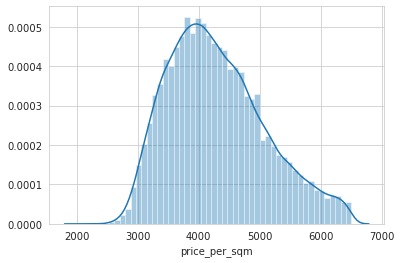

In [112]:
sns.distplot(df_merged['price_per_sqm'], bins=50)

# Linear Regression Model

In [125]:
X = df_merged.drop(['Town','price_per_sqm', 'flat_type'], axis=1)
y = df_merged['price_per_sqm']

In [126]:
from sklearn.model_selection import train_test_split

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [128]:
from sklearn.linear_model import LinearRegression

In [129]:
lm = LinearRegression()

In [130]:
lm.fit(X_train,y_train)

LinearRegression()

In [131]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df.sort_values(by='Coefficient', ascending=False)

,Coefficient
Bar,-7.504200e+16
Fitness,-7.504200e+16
Grocery,-7.504200e+16
Nature,-7.504200e+16
Amenities,-7.504200e+16
Recreation,-7.504200e+16
Casual Dining,-7.504200e+16
Stores,-7.504200e+16
Public Transport,-7.504200e+16


# Predicitions from model

In [132]:
predictions = lm.predict(X_test)

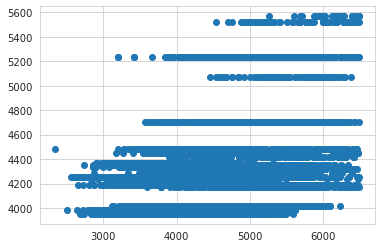

In [133]:
plt.scatter(y_test,predictions)

In [134]:
from sklearn import metrics

In [135]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 600.1782507571705
MSE: 548520.1647115431
RMSE: 740.6214719487568


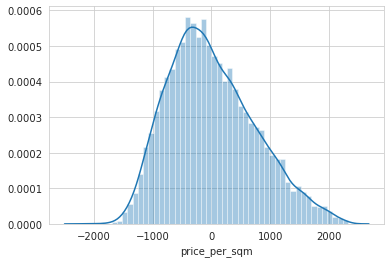

In [136]:
sns.distplot((y_test - predictions), bins=50)

In [137]:
num_top_venues = 5

for town in sg_grouped['Town']:
    print("----"+town+"----")
    temp = sg_grouped[sg_grouped['Town'] == town].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----ANG MO KIO----
           venue  freq
0  Casual Dining  0.73
1         Stores  0.12
2        Fitness  0.05
3        Grocery  0.05
4     Recreation  0.02


----BEDOK----
           venue  freq
0  Casual Dining  0.74
1         Stores  0.15
2     Recreation  0.05
3        Grocery  0.03
4            Bar  0.03


----BISHAN----
           venue  freq
0  Casual Dining  0.67
1         Stores  0.19
2     Recreation  0.05
3        Grocery  0.05
4        Fitness  0.02


----BUKIT BATOK----
              venue  freq
0     Casual Dining  0.68
1        Recreation  0.18
2            Stores  0.14
3  Public Transport  0.00
4           Fitness  0.00


----BUKIT MERAH----
           venue  freq
0  Casual Dining  0.48
1     Recreation  0.14
2         Nature  0.14
3        Fitness  0.10
4            Bar  0.10


----BUKIT PANJANG----
              venue  freq
0     Casual Dining  0.71
1            Stores  0.15
2           Grocery  0.05
3  Public Transport  0.02
4           Fitness  0.02


----BUKIT TIMA

In [138]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [139]:
num_top_venues=5
indicators=['st','nd','rd']

#create columns according to number of top venues
columns=['Town']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1,indicators[ind]))
    except:
        columns.append('{} the most common venue'.format(ind+1))
        
#create new dataframe
town_venues_sorted = pd.DataFrame(columns=columns)
town_venues_sorted['Town'] = sg_grouped['Town']

for ind in np.arange(sg_grouped.shape[0]):
    town_venues_sorted.iloc[ind,1:] = return_most_common_venues(sg_grouped.iloc[ind,:], num_top_venues)

town_venues_sorted.set_index('Town')

,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4 the most common venue,5 the most common venue
Town,,,,,
ANG MO KIO,Casual Dining,Stores,Grocery,Fitness,Amenities
BEDOK,Casual Dining,Stores,Recreation,Bar,Grocery
BISHAN,Casual Dining,Stores,Grocery,Recreation,Nature
BUKIT BATOK,Casual Dining,Recreation,Stores,Amenities,Bar
BUKIT MERAH,Casual Dining,Nature,Recreation,Bar,Fitness
BUKIT PANJANG,Casual Dining,Stores,Grocery,Bar,Recreation
BUKIT TIMAH,Nature,Recreation,Amenities,Bar,Grocery
CENTRAL AREA,Casual Dining,Recreation,Bar,Stores,Amenities
CHOA CHU KANG,Casual Dining,Public Transport,Grocery,Recreation,Fitness


In [140]:
kclusters4=4
kclusters10=10


# Running test on optimal number of K for K-means clustering
sgp_grouped_cluster= sg_grouped.drop('Town',1)
kmeans4= KMeans(n_clusters=kclusters4, random_state=0).fit(sgp_grouped_cluster)
kmeans10= KMeans(n_clusters=kclusters10, random_state=0).fit(sgp_grouped_cluster)

print(kmeans4.labels_[0:kclusters4])
print(len(kmeans4.labels_))

print(kmeans10.labels_[0:kclusters10])
print(len(kmeans10.labels_))


# Given that optimal number of k returns 2, we use 2 as k.
#kclusters=2
#kmeans= KMeans(n_clusters=kclusters, random_state=0).fit(sg_grouped_cluster)
#print(kmeans.labels_[0:kclusters])
#print(len(kmeans.labels_))

[3 3 0 0]
26
[9 9 0 8 6 9 1 2 7 9]
26


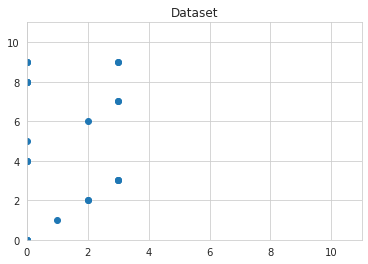

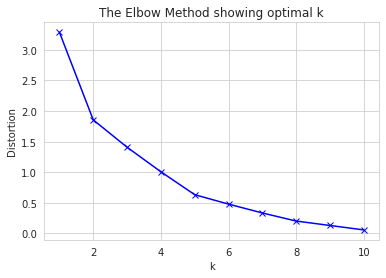

In [141]:
x1 = kmeans4.labels_
x2= kmeans10.labels_

from scipy.spatial.distance import cdist
plt.plot()
plt.xlim([0,11])
plt.ylim([0,11])
plt.title('Dataset')
plt.scatter(x1,x2)
plt.show()

X= np.array(list(zip(x1,x2))).reshape(len(x1),2)
# colors_mark=['b','g','r']
# markers=['o','v','s']

#k means determine k 
distortions =[]
K= range(1,11)
for k in K: 
    kmeanModel= KMeans(n_clusters =k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,'euclidean'),axis=1))/X.shape[0])

plt.plot(K, distortions,'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing optimal k')
plt.show()

In [272]:
df3.head()

,Town,price_per_sqm,latitude,longitude
0,ANG MO KIO,5132.0,1.370080,103.849523
1,BEDOK,4486.0,1.323976,103.930216
2,BISHAN,5497.0,1.350986,103.848255
3,BUKIT BATOK,4032.0,1.349057,103.749591
4,BUKIT MERAH,5186.0,1.274864,103.820276


In [142]:
kclusters5=5

# Running test on optimal number of K for K-means clustering
sgp_grouped_cluster= sg_grouped.drop('Town',1)
kmeans5= KMeans(n_clusters=kclusters5, random_state=0).fit(sgp_grouped_cluster)


print(kmeans5.labels_[0:kclusters5])
print(len(kmeans5.labels_))

[3 3 0 0 2]
26


In [143]:
df3.rename(columns={'town':'Town'}, inplace =True)
sg_merged= df3.set_index('Town')

sg_merged['Cluster Labels']= kmeans5.labels_
#merge sgp_grouped 
sg_merged=sg_merged.join(town_venues_sorted.set_index('Town'))
sg_merged.head()

,price_per_sqm,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4 the most common venue,5 the most common venue
Town,,,,,,,,,
ANG MO KIO,5132.0,1.370080,103.849523,3,Casual Dining,Stores,Grocery,Fitness,Amenities
BEDOK,4486.0,1.323976,103.930216,3,Casual Dining,Stores,Recreation,Bar,Grocery
BISHAN,5497.0,1.350986,103.848255,0,Casual Dining,Stores,Grocery,Recreation,Nature
BUKIT BATOK,4032.0,1.349057,103.749591,0,Casual Dining,Recreation,Stores,Amenities,Bar
BUKIT MERAH,5186.0,1.274864,103.820276,2,Casual Dining,Nature,Recreation,Bar,Fitness


In [150]:
sg_merged = sg_merged.reset_index()

In [279]:
#sg_merged = df3.merge(sg_grouped,how='left', left_on='Town', right_on='Town')

In [151]:
sg_merged.sort_values('Cluster Labels')

,Town,price_per_sqm,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4 the most common venue,5 the most common venue
12,JURONG EAST,4334.0,1.333108,103.742294,0,Casual Dining,Stores,Recreation,Bar,Grocery
22,TAMPINES,4433.0,1.354653,103.943571,0,Casual Dining,Stores,Fitness,Recreation,Grocery
21,SERANGOON,4693.0,1.349761,103.873684,0,Casual Dining,Stores,Nature,Grocery,Recreation
17,PUNGGOL,4722.0,1.405197,103.902350,0,Casual Dining,Stores,Recreation,Grocery,Nature
24,WOODLANDS,3606.0,1.436897,103.786216,0,Casual Dining,Stores,Recreation,Grocery,Nature
9,CLEMENTI,5028.0,1.315100,103.765231,0,Casual Dining,Stores,Recreation,Fitness,Bar
25,YISHUN,3978.0,1.429384,103.835028,0,Casual Dining,Stores,Public Transport,Grocery,Recreation
5,BUKIT PANJANG,4247.0,1.379149,103.761413,0,Casual Dining,Stores,Grocery,Bar,Recreation
2,BISHAN,5497.0,1.350986,103.848255,0,Casual Dining,Stores,Grocery,Recreation,Nature
3,BUKIT BATOK,4032.0,1.349057,103.749591,0,Casual Dining,Recreation,Stores,Amenities,Bar


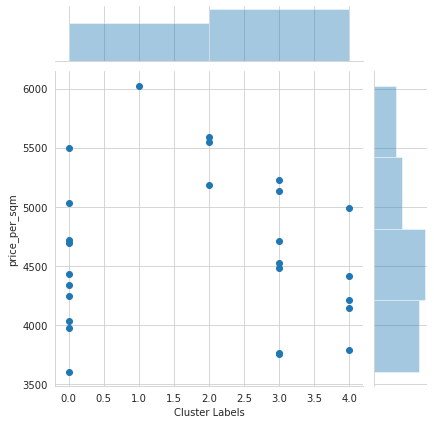

In [145]:
sns.jointplot(x='Cluster Labels', y='price_per_sqm', data = sg_merged)

In [ ]:
#visualize the resulting clusters

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=7)

# set color scheme for the clusters
x = np.arange(kclusters5)
ys = [i + x + (i*x)**2 for i in range(kclusters5)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(nearby_business_merged['Venue Latitude'], nearby_business_merged['Venue Longitude'], nearby_business_merged['Venue'], nearby_business_merged['Cluster Labels']):
    if not math.isnan(cluster):
        label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
        folium.CircleMarker(
            [lat, lon],
            radius=5,
            popup=label,
            color=rainbow[int(cluster)],
            fill=True,
            fill_color=rainbow[int(cluster)],
            fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [158]:
#create a map of Singapore 
map_singapore= folium.Map(location=[latitude,longitude],tiles="OpenStreetMap",zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters5)
ys = [i + x + (i*x)**2 for i in range(kclusters5)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

#add towns to map
for lat,lng,town,cluster in zip(sg_merged['latitude'],sg_merged['longitude'],
                        sg_merged['Town'],sg_merged['Cluster Labels']):
    if not math.isnan(cluster):
        label = folium.Popup(str(town) + ' Cluster ' + str(cluster), parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color=rainbow[int(cluster)],
            fill=True,
            fill_color=rainbow[int(cluster)],
            fill_opacity=0.7).add_to(map_singapore)
       
map_singapore

Cluster 0

In [160]:
sg_merged.loc[sg_merged['Cluster Labels'] == 0, sg_merged.columns[[1] + list(range(5, sg_merged.shape[1]))]]

,price_per_sqm,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4 the most common venue,5 the most common venue
2,5497.0,Casual Dining,Stores,Grocery,Recreation,Nature
3,4032.0,Casual Dining,Recreation,Stores,Amenities,Bar
5,4247.0,Casual Dining,Stores,Grocery,Bar,Recreation
9,5028.0,Casual Dining,Stores,Recreation,Fitness,Bar
12,4334.0,Casual Dining,Stores,Recreation,Bar,Grocery
17,4722.0,Casual Dining,Stores,Recreation,Grocery,Nature
21,4693.0,Casual Dining,Stores,Nature,Grocery,Recreation
22,4433.0,Casual Dining,Stores,Fitness,Recreation,Grocery
24,3606.0,Casual Dining,Stores,Recreation,Grocery,Nature
25,3978.0,Casual Dining,Stores,Public Transport,Grocery,Recreation


Cluster 1

In [161]:
sg_merged.loc[sg_merged['Cluster Labels'] == 1, sg_merged.columns[[1] + list(range(5, sg_merged.shape[1]))]]

,price_per_sqm,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4 the most common venue,5 the most common venue
6,6024.0,Nature,Recreation,Amenities,Bar,Grocery


Cluster 2

In [162]:
sg_merged.loc[sg_merged['Cluster Labels'] == 2, sg_merged.columns[[1] + list(range(5, sg_merged.shape[1]))]]

,price_per_sqm,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4 the most common venue,5 the most common venue
4,5186.0,Casual Dining,Nature,Recreation,Bar,Fitness
7,5545.0,Casual Dining,Recreation,Bar,Stores,Amenities
15,5592.0,Casual Dining,Recreation,Amenities,Stores,Bar


Cluster 3

In [164]:
sg_merged.loc[sg_merged['Cluster Labels'] == 3, sg_merged.columns[[1] + list(range(5, sg_merged.shape[1]))]]

,price_per_sqm,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4 the most common venue,5 the most common venue
0,5132.0,Casual Dining,Stores,Grocery,Fitness,Amenities
1,4486.0,Casual Dining,Stores,Recreation,Bar,Grocery
8,3765.0,Casual Dining,Public Transport,Grocery,Recreation,Fitness
10,4711.0,Casual Dining,Stores,Recreation,Fitness,Amenities
13,3757.0,Casual Dining,Stores,Recreation,Amenities,Grocery
18,5223.0,Casual Dining,Recreation,Fitness,Public Transport,Amenities
23,4520.0,Casual Dining,Stores,Grocery,Recreation,Amenities


Cluster 4

In [165]:
sg_merged.loc[sg_merged['Cluster Labels'] == 4, sg_merged.columns[[1] + list(range(5, sg_merged.shape[1]))]]

,price_per_sqm,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4 the most common venue,5 the most common venue
11,4207.0,Casual Dining,Stores,Public Transport,Grocery,Fitness
14,4991.0,Casual Dining,Amenities,Stores,Grocery,Bar
16,4145.0,Casual Dining,Public Transport,Stores,Grocery,Nature
19,3788.0,Casual Dining,Stores,Grocery,Fitness,Amenities
20,4412.0,Casual Dining,Stores,Amenities,Grocery,Nature
